In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d


In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))

train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-1]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-1]), df_pions[-1000:,-1]



In [3]:
#opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.7, beta_2= 0.99)
#inital_test = cf.trained_network(train_x[:100],train_y[:100],val_x,val_y,[512,512], optimizer= opt, verbose= 0).history


I think I want a b1,b2 array at which I evaluate the minimum point for all of these I think again this should be a mean from 10

In [6]:

def adam_tester(num_beta_1D,repeats,section = None):
    beta_range = np.linspace(0.5,0.99,num_beta_1D)
    mae_min = np.zeros((num_beta_1D,num_beta_1D,repeats))
    a = 0
    for i in range(num_beta_1D):
        for j in range(num_beta_1D):
            a += 1
            print('#',a)
            opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = beta_range[i], beta_2= beta_range[j])
            for k in range(repeats):
                mae_min[i,j,k] = np.min(cf.trained_network(train_x[:section],train_y[:section],val_x,val_y,[512,512], optimizer= opt, verbose= 0,batch_size= 256).history['val_mean_absolute_percentage_error'])
    return mae_min, beta_range



In [7]:
mape_min_multiple, beta_range = adam_tester(10,5)

# 1
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9
# 10
# 11
# 12
# 13
# 14
# 15
# 16
# 17
# 18
# 19
# 20
# 21
# 22
# 23
# 24
# 25
# 26
# 27
# 28
# 29
# 30
# 31
# 32
# 33
# 34
# 35
# 36
# 37
# 38
# 39
# 40
# 41
# 42
# 43
# 44
# 45
# 46
# 47
# 48
# 49
# 50
# 51
# 52
# 53
# 54
# 55
# 56
# 57
# 58
# 59
# 60
# 61
# 62
# 63
# 64
# 65
# 66
# 67
# 68
# 69
# 70
# 71
# 72
# 73
# 74
# 75
# 76
# 77
# 78
# 79
# 80
# 81
# 82
# 83
# 84
# 85
# 86
# 87
# 88
# 89
# 90
# 91
# 92
# 93
# 94
# 95
# 96
# 97
# 98
# 99
# 100


In [8]:

min_mae_2d = mape_min_multiple.reshape(mape_min_multiple.shape[0],-1)

In [9]:
np.savetxt('adam_beta_test.csv',min_mae_2d,delimiter=',')

In [18]:
loaded_reshape = np.loadtxt('adam_beta_test.csv',delimiter= ',')
loaded_mae_min = loaded_reshape.reshape(10,100//10,5)

In [19]:
print(loaded_mae_min.shape)
if np.isclose(mape_min_multiple,loaded_mae_min).all:
    print('fuck yes')
else: 
    print('dum cunt ')


(10, 10, 5)
fuck yes


In [23]:
print(loaded_mae_min)

[[[5.20863628e+00 5.42826796e+00 4.58118153e+00 5.03673935e+00
   5.01787758e+00]
  [5.52388477e+00 4.87974691e+00 4.86262321e+00 4.73653889e+00
   5.00601959e+00]
  [4.63755989e+00 5.54694939e+00 4.79693270e+00 5.24831200e+00
   5.17326641e+00]
  [5.04678011e+00 5.30055904e+00 5.21116495e+00 5.04240322e+00
   5.21604967e+00]
  [5.55495071e+00 5.81896114e+00 5.06259060e+00 4.78725386e+00
   5.41828537e+00]
  [5.38545799e+00 5.03005695e+00 5.36229277e+00 4.66413069e+00
   5.09906530e+00]
  [5.07257223e+00 5.47291851e+00 5.81764078e+00 5.86218786e+00
   5.30980587e+00]
  [5.43256140e+00 5.31960917e+00 5.06078959e+00 4.89790440e+00
   5.39939642e+00]
  [4.80533552e+00 5.38917160e+00 5.07624817e+00 5.14898634e+00
   4.96226501e+00]
  [5.57323647e+00 5.29159975e+00 5.28553820e+00 5.84450579e+00
   5.01949358e+00]]

 [[5.30607224e+00 5.13655090e+00 4.88157845e+00 5.36327600e+00
   4.54234362e+00]
  [4.70257998e+00 5.39130211e+00 4.88807821e+00 5.37838459e+00
   4.98250055e+00]
  [4.60695267e

In [20]:
mean_mae_min = np.nan_to_num(np.mean(loaded_mae_min,axis = 2))
beta_range = np.linspace(0.5,0.99,10)

In [24]:
mean_mae_min[np.where(mean_mae_min>10)] = 10
beta_range_array = np.ones_like(mean_mae_min)*beta_range
beta_range_array_2 = beta_range_array.transpose()

Text(0.5, 0, 'Mean Minimum MAE')

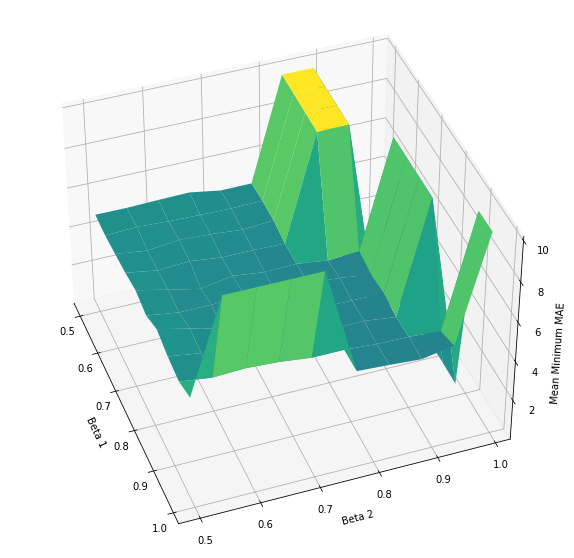

In [25]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(beta_range_array, beta_range_array_2, mean_mae_min , cmap = 'viridis')
ax.view_init(40,340)
ax.set_xlabel('Beta 1')
ax.set_ylabel('Beta 2')
ax.set_zlabel('Mean Minimum MAE')

In [27]:
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/Adam_Beta_parameters_contour_plot_djuna_test.png',dpi = 300)

In [30]:
print(np.where(np.min(mean_mae_min) ==mean_mae_min))
print('Optimised beta 1 =', beta_range_array[7,9],'Optimised Beta 2 =', round(beta_range_array_2[7,9],3))

(array([8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9]), array([0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7]))
Optimised beta 1 = 0.99 Optimised Beta 2 = 0.881


In [31]:
print(beta_range[7],beta_range[9])
print(np.min(mean_mae_min))

0.8811111111111111 0.99
0.15


Best Beta value 
B1 = 0.881
B2 = 0.99